In [5]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
## Task 1: Read the .wav file, get the sampling rate, number of samples, time data.
file_path = "/Users/jithinbathula/Documents/Internships/Panasonic/Audio 1/clip1.wav"

sampling_rate,data = wavfile.read(file_path)
num_of_samples = data.shape[0]
duration = num_of_samples/sampling_rate
time_data = np.linspace(0, duration, num_of_samples)

print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Number of Samples: {num_of_samples}")
print(f"Duration: {duration} seconds")
print(time_data)

Sampling Rate: 44100 Hz
Number of Samples: 2403450
Duration: 54.5 seconds
[0.00000000e+00 2.26757464e-05 4.53514928e-05 ... 5.44999546e+01
 5.44999773e+01 5.45000000e+01]


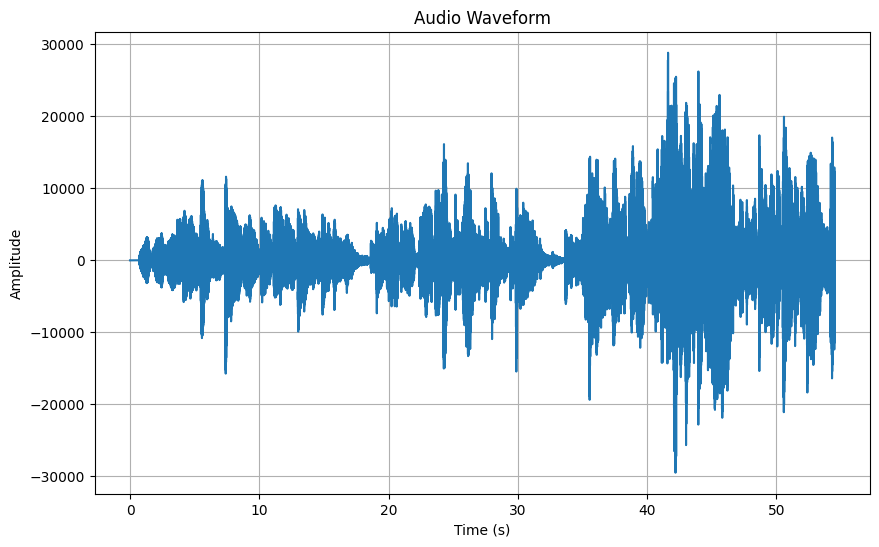

In [7]:
## Task 2: Plot the data obtained from 1) against a time axis in seconds, i.e., the x‐axis should be labeled in Time (s)
plt.figure(figsize=(10, 6))
plt.plot(time_data, data)
plt.title('Audio Waveform',)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

/Users/jithinbathula/Documents/Internships/Panasonic/venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


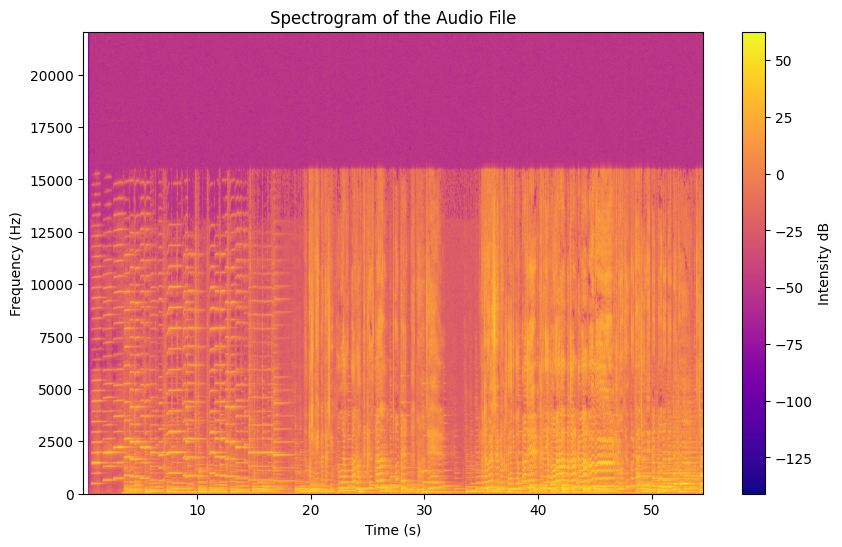

In [8]:
## Task 3: Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(data, Fs=sampling_rate, NFFT=2048, noverlap=1024, cmap='plasma')
plt.title('Spectrogram of the Audio File')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Intensity dB')
plt.show()

In [9]:
## Task 4: Process the signal in frames of length 20ms, with 0% overlap, print the number of frames to be processed
samples_per_frame = int(0.020 * sampling_rate)
frames = []

for i in range(0, len(data), samples_per_frame):
    frame = data[i:i + samples_per_frame]
    if len(frame) == samples_per_frame:
        frames.append(frame)

print(f"Number of frames to be processed: {len(frames)}")

Number of frames to be processed: 2725


In [10]:
## Task 5: Write every 20ms audio data (column wise) into excel
df = pd.DataFrame(frames).transpose()
excel_path = 'audio_data.xlsx'
df.to_excel(excel_path, index=False)
print(f"Data written to Excel file: {excel_path}")